In [1]:
import sys
sys.path.append(".")


Using TensorFlow backend.
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from attacks import *
from datasets import *

In [9]:
dataset = CIFAR10Dataset()
X_test_all, Y_test_all = dataset.get_test_dataset()


Shape of input data (10000, 28, 28, 1)


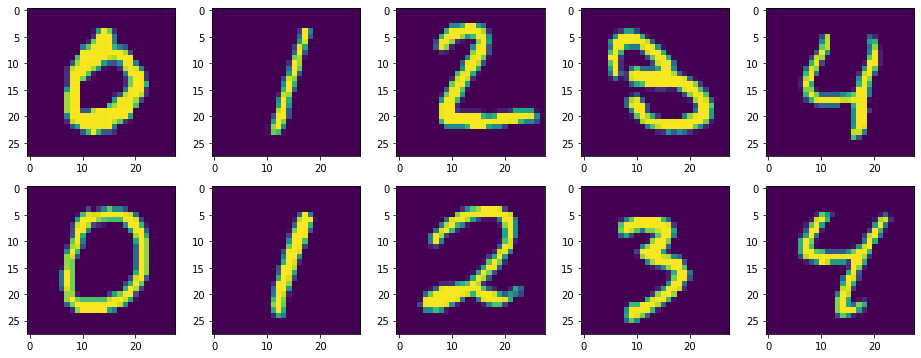

In [39]:
examples = get_first_n_examples_id_each_class(Y_test_all, 2)
fig, axes = plt.subplots(2,5, figsize=(16,6))
print("Shape of input data",X_test_all.shape)
index = 0
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(X_test_all[examples[(i)*10+j]])
        index += 1

Shape of input data (10000, 28, 28, 1)


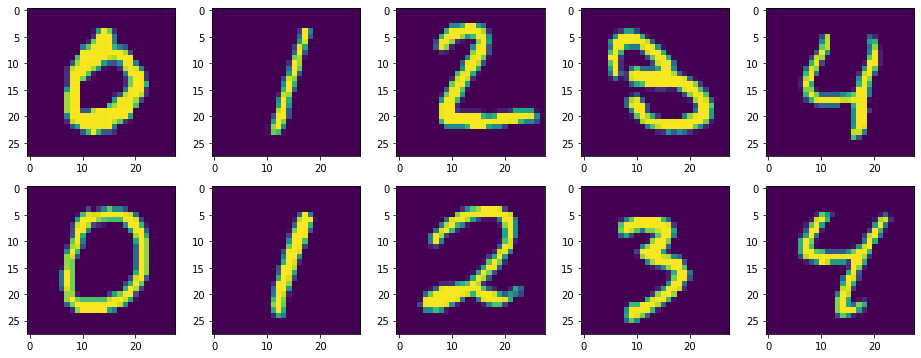

In [32]:
dataset = MNISTDataset()
X_test_all, Y_test_all = dataset.get_test_dataset()
examples = get_first_n_examples_id_each_class(Y_test_all, 2)
fig, axes = plt.subplots(2,5, figsize=(16,6))
print("Shape of input data",X_test_all.shape)
index = 0
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(X_test_all[examples[(i)*10+j]])
        index += 1

In [35]:
from models import *

dataset = CIFAR10Dataset()
model = CIFAR10_densenet40(rel_path='./')
X_test, Y_test, Y_test_target_ml, Y_test_target_ll = get_data_subset_with_systematic_attack_labels(dataset=dataset, model=model, balanced=True, num_examples=100)

Loading the dataset...
Evaluating the target model...

Statistics of Dataset (0.005485 seconds per sample)
Test accuracy on benign examples 94.84%
Mean confidence on ground truth classes 92.15%
Selected 100 examples.
Test accuracy on selected benign examples 100.00%
Mean confidence on ground truth classes, selected 95.55%



Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Shape of input data (10000, 28, 28, 1)


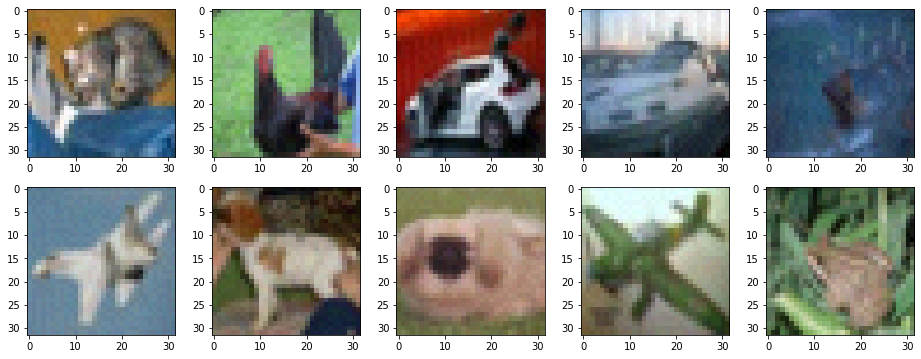

Shape of input data (100, 32, 32, 3)


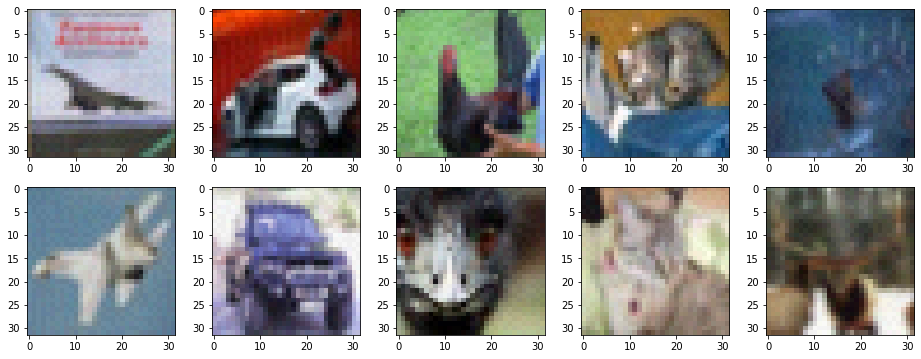

In [40]:
fgsm = Attack_FastGradientMethod(eps=0.0156)
X_test_adv = fgsm.attack(model, X_test, Y_test)
examples = get_first_n_examples_id_each_class(Y_test, 2)
fig, axes = plt.subplots(2,5, figsize=(16,6))
print("Shape of input data",X_test_adv.shape)
index = 0
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(X_test_adv[examples[(i)*10+j]])
        index += 1

Shape of input data (100, 32, 32, 3)


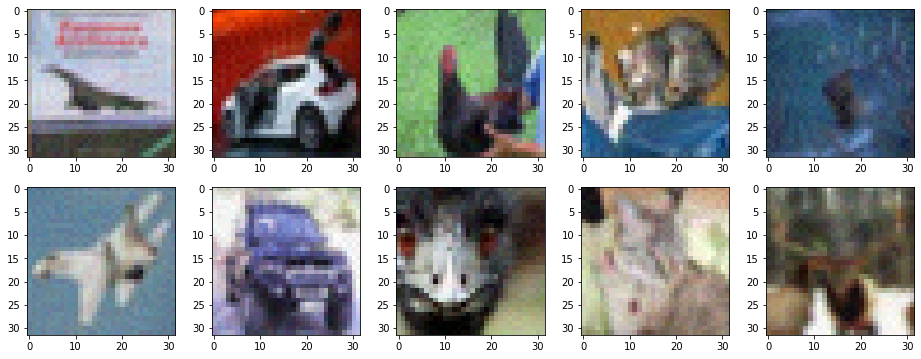

In [41]:
X_test_adv_2 = fgsm.attack(model, X_test_adv, Y_test)
examples = get_first_n_examples_id_each_class(Y_test, 2)
fig, axes = plt.subplots(2,5, figsize=(16,6))
print("Shape of input data",X_test_adv_2.shape)
index = 0
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(X_test_adv_2[examples[(i)*10+j]])
        index += 1

Shape of input data (100, 32, 32, 3)


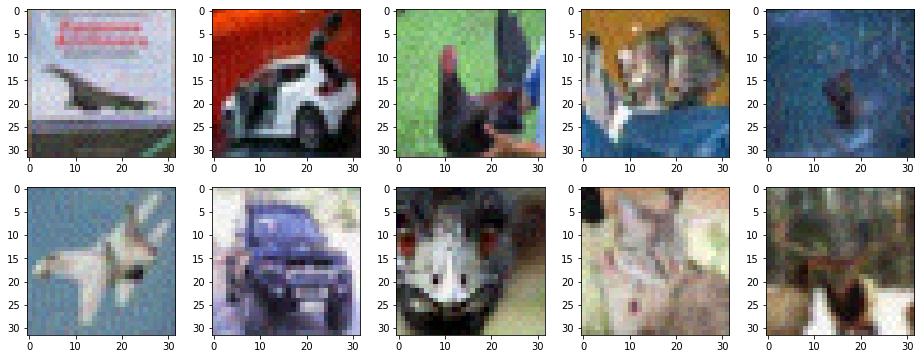

In [42]:
X_test_adv_3 = fgsm.attack(model, X_test_adv_2, Y_test)
examples = get_first_n_examples_id_each_class(Y_test, 2)
fig, axes = plt.subplots(2,5, figsize=(16,6))
print("Shape of input data",X_test_adv_3.shape)
index = 0
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(X_test_adv_3[examples[(i)*10+j]])
        index += 1

In [51]:
X_test_adv_3[examples]

array([[[[0.6234432 , 0.6585648 , 0.5687137 ],
         [0.6081019 , 0.7057961 , 0.7489334 ],
         [0.6745961 , 0.7175608 , 0.80366284],
         ...,
         [0.7414352 , 0.75302744, 0.7728078 ],
         [0.8077569 , 0.83895695, 0.8469726 ],
         [0.7061411 , 0.70204705, 0.6549882 ]],

        [[0.61560005, 0.65464324, 0.6000863 ],
         [0.6236157 , 0.6551607 , 0.7844    ],
         [0.6861883 , 0.67476857, 0.82753724],
         ...,
         [0.83895695, 0.86248636, 0.88618827],
         [0.74927837, 0.8587373 , 0.87459606],
         [0.72557646, 0.698298  , 0.7332471 ]],

        [[0.65464324, 0.58832157, 0.5844    ],
         [0.611851  , 0.71363926, 0.80383533],
         [0.6432235 , 0.67869014, 0.8196941 ],
         ...,
         [0.7922431 , 0.80008626, 0.82753724],
         [0.75319993, 0.82753724, 0.86283135],
         [0.72557646, 0.76461965, 0.73716867]],

        ...,

        [[0.33341962, 0.29420394, 0.22753726],
         [0.20792942, 0.19224314, 0.21952157]

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


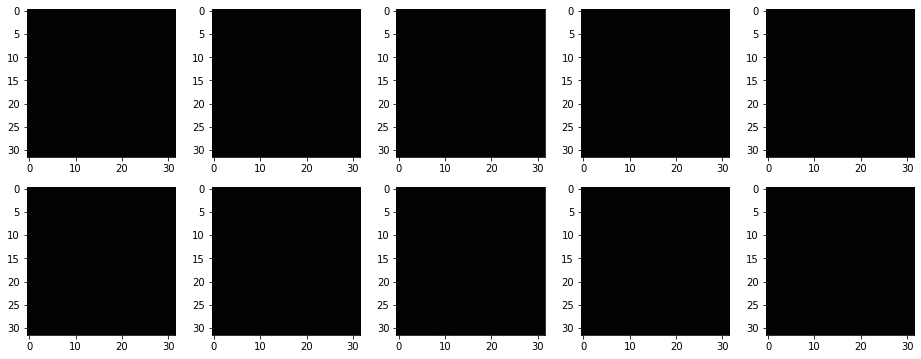

In [52]:

jsma = Attack_JacobianSaliencyMapMethod(gamma=0.1)
time_start = time.time()
test_adv = jsma.attack(model, X_test[examples], Y_test_target_ll[examples])
dur_per_sample = (time.time() - time_start) / len(X_test_adv)


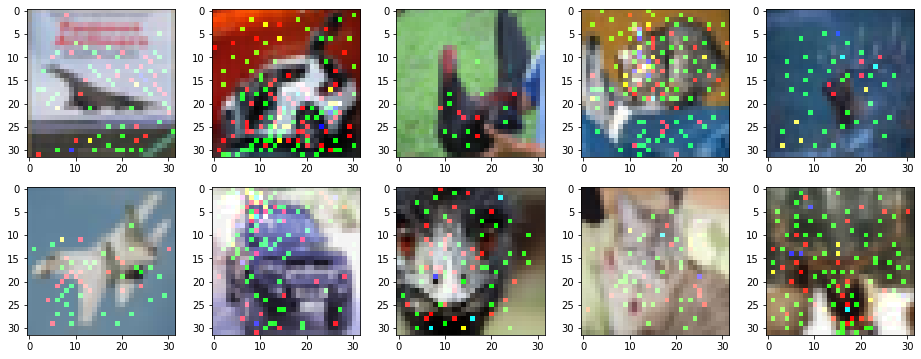

In [53]:
fig, axes = plt.subplots(2,5, figsize=(16,6))
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(abs(test_adv[examples[(i)*10+j]]))
        index += 1